# Feedback Analysis - Tagging Task

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
client = MongoClient('localhost')
db = client['crowdy']

In [6]:
db.collection_names()
hits = db.hits
ts = db.tasksets

## Feedback Scores

How satisfied were people with the tasks?

In [150]:
fdbkraw = ts.aggregate([
    {'$project': {'hit_id':1, 'pay':'$feedback.pay', 'satisfaction':'$feedback.satisfaction', 'text':'$feedback.form'}}
])
feedback = pd.DataFrame(list(fdbkraw)).convert_objects(convert_numeric=True)
feedback.dtypes

_id              object
hit_id           object
pay             float64
satisfaction    float64
text             object
dtype: object

In [161]:
groups = feedback[['hit_id', 'pay', 'satisfaction']].groupby('hit_id')
groups.agg([np.mean, np.median, np.var, len])

pay                      satisfaction         \
                              mean median       var len         mean median   
hit_id                                                                        
55911fb049eb7fef15c0f5c2  3.790698      4  0.931340  61     3.790698      4   
55a48ddcc8f17da574db50b7  3.947368      4  0.429587  72     4.184211      4   

                                        
                               var len  
hit_id                                  
55911fb049eb7fef15c0f5c2  0.740864  61  
55a48ddcc8f17da574db50b7  0.370555  72

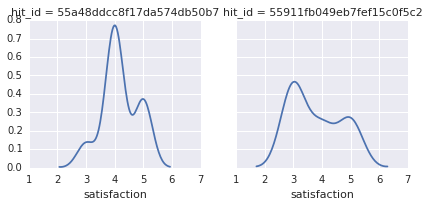

In [175]:
g = sns.FacetGrid(feedback, col='hit_id', margin_titles=True)
bins = np.linspace(1, 0.1, 1)
g.map(sns.distplot, "satisfaction", bins=bins)

In [11]:
a.groupby('hit_id').mean()

,timeSpent
hit_id,
55911fb049eb7fef15c0f5c2,23.879284
55a48ddcc8f17da574db50b7,11.459299


In [12]:
a.groupby('hit_id').median()

,timeSpent
hit_id,
55911fb049eb7fef15c0f5c2,18.3165
55a48ddcc8f17da574db50b7,6.9390


In [13]:
a.groupby('hit_id').count('timeSpent')

,_id,timeSpent,user
hit_id,,,
55911fb049eb7fef15c0f5c2,500,500,500
55a48ddcc8f17da574db50b7,500,498,500
